In [193]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import random as rd

In [213]:
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])

C:\Users\SEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


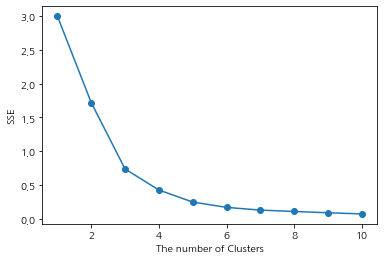

[2.9972341664107103, 1.7186687910582603, 0.7363185681086353, 0.42492855182612316, 0.24690095115974897, 0.16812020213532072, 0.12768680851797515, 0.10737190931334958, 0.08825675110758174, 0.07111929793336241]


In [195]:
# 비계층적 군집분석 : K-means
def elbow(x) :
    sse=[]
    for i in range(1,11) :
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(x_df)

In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
# 콜린스키하라바츠스코어
for k in range(2,10) :
    kmeans_model = KMeans(n_clusters = k, random_state=1).fit(x_df)
    labels=kmeans_model.labels_
    print(k, calinski_harabasz_score(x_df, labels))

2 14.878554634894853
3 29.17038781059339
4 36.32100884061775
5 47.342531934004846
6 53.84935641698976
7 56.183316647952196
8 53.82901869917783
9 53.56064256325769


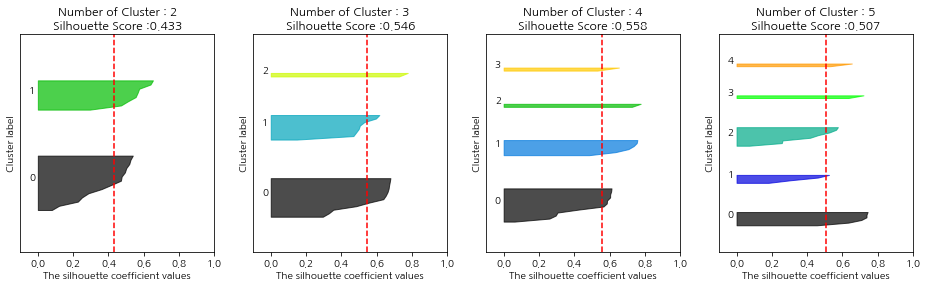

In [197]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
visualize_silhouette([2, 3, 4, 5], x_df)

In [214]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans_model = KMeans(n_clusters=4).fit(x_df)
x_df['cluster_k'] = kmeans_model.labels_
x_df['silhoutte_coeff']=silhouette_samples(x_df,x_df['cluster_k'])
average_score = silhouette_score(x_df, x_df['cluster_k'])
print(average_score)
print(x_df.groupby('cluster_k')['silhoutte_coeff'].mean())

0.8368703654131436
cluster_k
0    0.819118
1    0.851290
2    0.886418
3    0.832425
Name: silhoutte_coeff, dtype: float64


C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


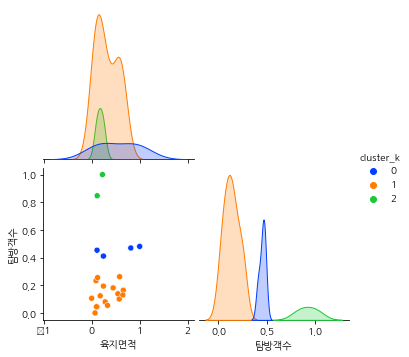

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
x_df1=x_df.drop(columns=['silhoutte_coeff'])
sns.pairplot(x_df1,
            diag_kind='kde',
             hue='cluster_k',
             corner=True,
             palette='bright')
plt.show()

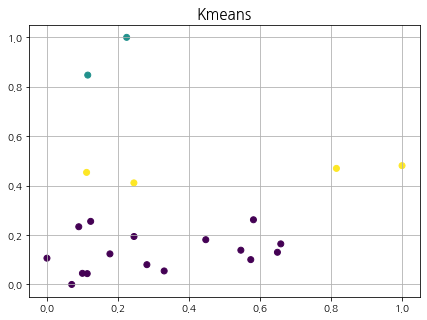

In [162]:
plt.figure(figsize=(7,5))
plt.title("Kmeans", fontsize=15)
plt.scatter(x_df.iloc[:,0],x_df.iloc[:,1],c=x_df['cluster_k'])
plt.grid()
plt.show()

In [173]:
df['cluster_k'] = kmeans_model.labels_
df.groupby('cluster_k').공원명.unique().reset_index()

,cluster_k,공원명
0,0,"[계룡산, 속리산, 한라산, 내장산, 가야산, 덕유산, 오대산, 주왕산, 태안해안,..."
1,1,"[한려해상, 북한산]"
2,2,"[지리산, 경주, 설악산, 무등산]"


In [136]:
# 계층적 군집분석
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])

from scipy.cluster.hierarchy import linkage
cluster_h = linkage(x_df, method='average', metric='euclidean')
print(cluster_h[-5:])

[[33.         37.          0.21033642 10.        ]
 [31.         38.          0.34086725 12.        ]
 [34.         39.          0.44539933 18.        ]
 [35.         40.          0.70394348 20.        ]
 [36.         41.          0.80653384 22.        ]]


군집화 일정표의 1~2열은 병합되는 군집번호, 3열은 군집간 거리, 4열은 군집에 속한 개체 수 이다.  
일정표 끝에서 3번째 단계의 군집간 거리가 0.44에서 두번째 단계인 0.70로 증가하여 폭이 크므로 3개로 나누는것이 적절해 보인다.

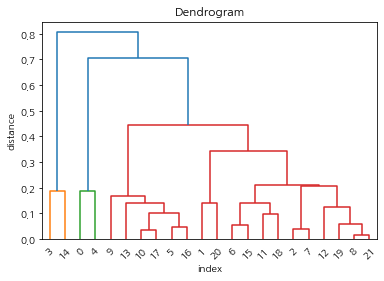

In [137]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster_h)
plt.show()

In [226]:
# DBSCAN
df = pd.read_csv('datasets/NLPRK_STA.csv', sep=',', encoding='cp949')
x=df.drop(columns=['공원명'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['육지면적','탐방객수'])

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
cluster_d = dbscan.fit(x_df)
x_df['cluster_d'] = dbscan.labels_

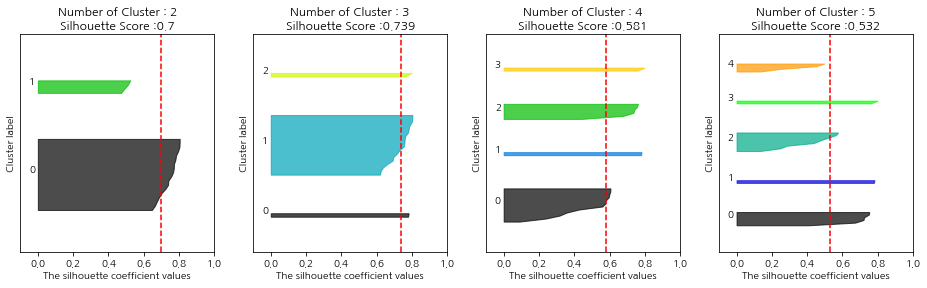

In [227]:
x_df['silhoutte_coeff']=silhouette_samples(x_df,x_df['cluster_d'])
visualize_silhouette([2, 3, 4, 5], x_df)

C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


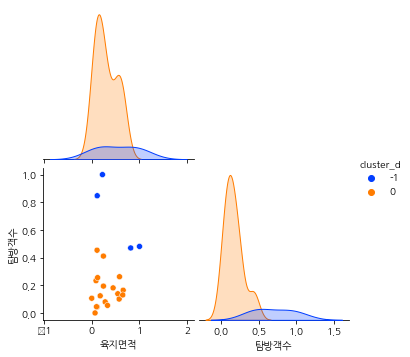

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
x_df1=x_df.drop(columns=['silhoutte_coeff'])
sns.pairplot(x_df1,
            diag_kind='kde',
             hue='cluster_d',
             corner=True,
             palette='bright')
plt.show()

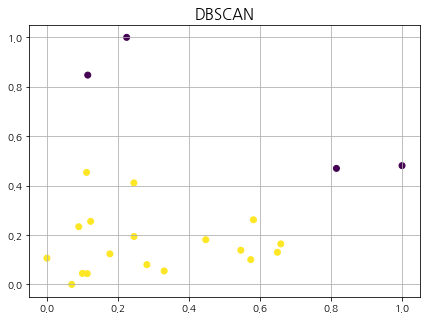

In [222]:
plt.figure(figsize=(7,5))
plt.title("DBSCAN", fontsize=15)
plt.scatter(x_df.iloc[:,0],x_df.iloc[:,1],c=x_df['cluster_d'])
plt.grid()
plt.show()